# Recession Probability - Dynamic Factor Markov Switching Model - FRED

In [3]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [4]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

#### Smoothed recession probabilities for the United States are obtained from a dynamic-factor markov-switching model applied to four monthly coincident variables: non-farm payroll employment, the index of industrial production, real personal income excluding transfer payments, and real manufacturing and trade sales.

#### The forecast has a delay of approx. 3 months due to delay between collecting data and computation of the forecast.

##### Source: [FRED](https://fred.stlouisfed.org/series/RECPROUSM156N), [The FRED Blog](https://fredblog.stlouisfed.org/2015/05/how-likely-is-a-recession-and-how-fast-is-a-forecast/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog)

In [5]:
# Pull recession probabilities
recession_prob = fred.get_series('RECPROUSM156N', observation_start='1990-01-01')
recession_prob = recession_prob.dropna()
recession_prob.tail()

2022-04-01    0.06
2022-05-01    0.18
2022-06-01    0.34
2022-07-01    0.14
2022-08-01    1.22
dtype: float64

In [10]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-08-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-28,4026.129883,4078.949951,3992.969971,4072.429932,4072.429932,3.882850e+09
2022-07-29,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,3.817740e+09
2022-07-30,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,3.817740e+09
2022-07-31,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,3.817740e+09
2022-08-01,4112.379883,4144.950195,4096.020020,4118.629883,4118.629883,3.540960e+09


In [11]:
# Pull VIX historical data
ticker = "^VIX"
start= "1990-01-01" 
end= "2022-08-02"

vix_history = yf.download(ticker, start=start,end=end, progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-28,23.330000,23.540001,22.219999,22.33,22.33,0.0
2022-07-29,22.129999,22.160000,21.209999,21.33,21.33,0.0
2022-07-30,22.129999,22.160000,21.209999,21.33,21.33,0.0
2022-07-31,22.129999,22.160000,21.209999,21.33,21.33,0.0
2022-08-01,22.410000,23.270000,22.260000,22.84,22.84,0.0


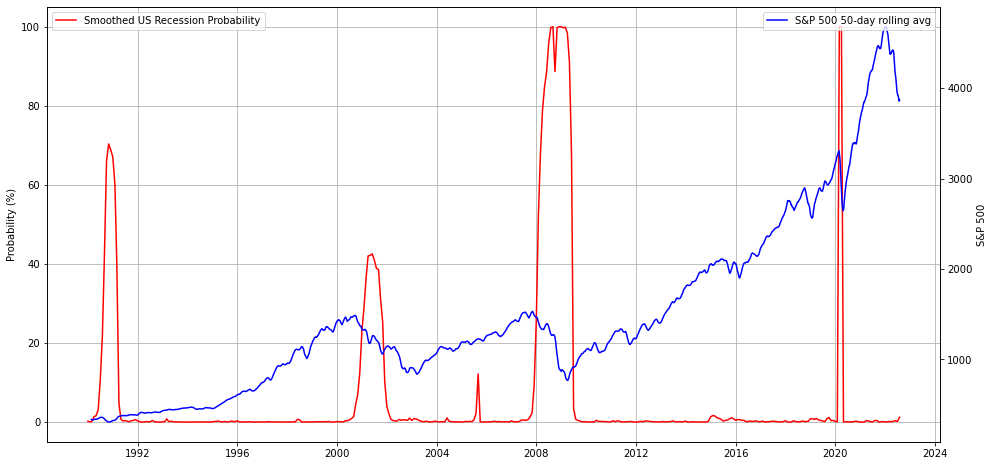

In [12]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(recession_prob, label ='Smoothed US Recession Probability', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

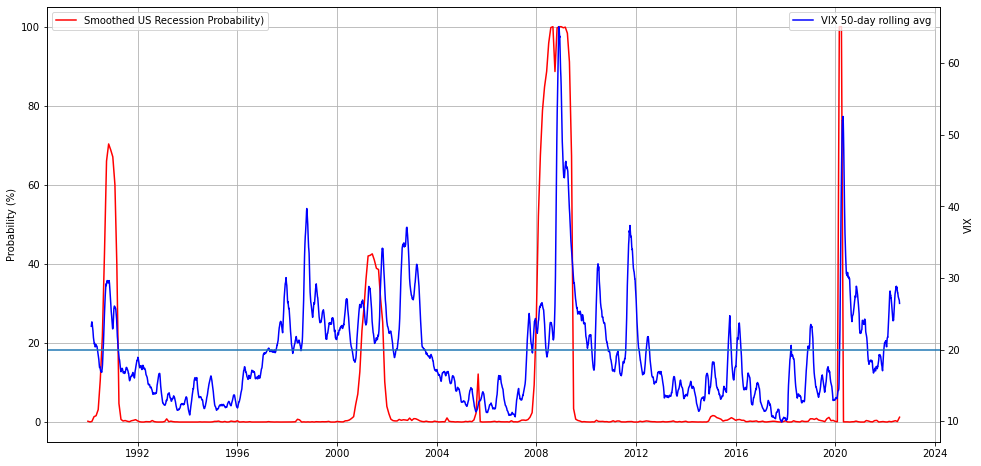

In [13]:
# Plot Recession Probability vs VIX - value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label ='VIX 50-day rolling avg', color='b')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)

# Recession Probability - 10 Year-3 Month Treasury Spread

#### The 10 Year-3 Month Treasury Yield Spread is the difference between the 10 year treasury rate and the 3 month treasury rate. This spread is widely used as a gauge to study the yield curve. A 10 year-3 month treasury spread that approaches 0 signifies a "flattening" yield curve. Furthermore, a negative 10 year-3 month spread has historically been viewed as a precursor or predictor of a recessionary period. The New York Fed uses the rate in a model to predict recessions 2 to 6 quarters ahead.

##### Source: [YCharts](https://ycharts.com/indicators/10_year_3_month_treasury_spread), [Federal Reserve Bank of New York, The Yield Curve as a Leading Indicator](https://www.newyorkfed.org/research/capital_markets/ycfaq.html)


In [14]:
# Pull 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
ten_three_treasury_spread = fred.get_series('T10Y3M', observation_start='1990-01-01')
ten_three_treasury_spread = ten_three_treasury_spread.dropna()
ten_three_treasury_spread.tail()

2022-10-24    0.09
2022-10-25   -0.04
2022-10-26   -0.07
2022-10-27   -0.17
2022-10-28   -0.16
dtype: float64

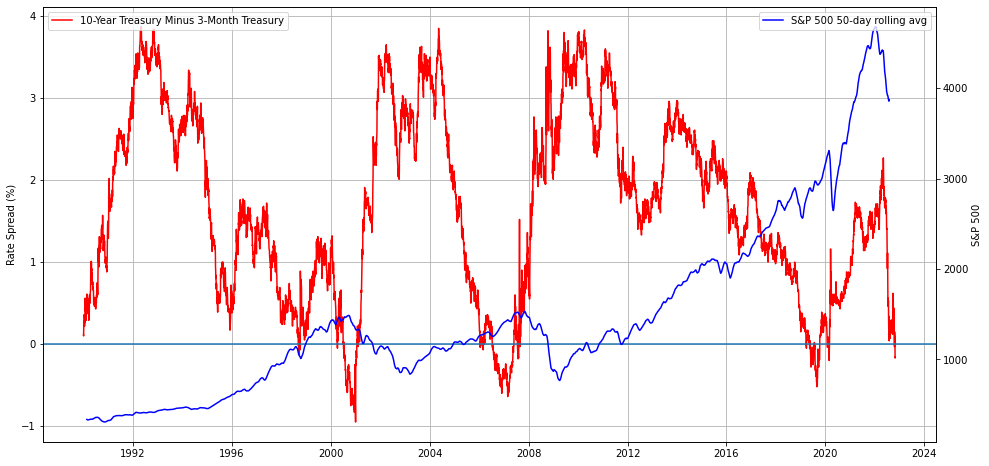

In [15]:
# Plot Ten Year-3 Month Treasury spread vs S&P 500
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='r')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

#### You may download calculated [recession probabilities](https://www.newyorkfed.org/research/capital_markets/ycfaq#/) in excel format from the Federal Reserve Bank of New York 

In [18]:
treasury_spread_recession_prob = pd.read_excel('resources/allmonth.xls', usecols=['Rec_prob', 'Date'])
treasury_spread_recession_prob =  treasury_spread_recession_prob.set_index('Date')
treasury_spread_recession_prob.tail()

,Rec_prob
Date,
2023-05-31,0.041063
2023-06-30,0.059258
2023-07-31,0.176265
2023-08-31,0.251495
2023-09-30,0.230673


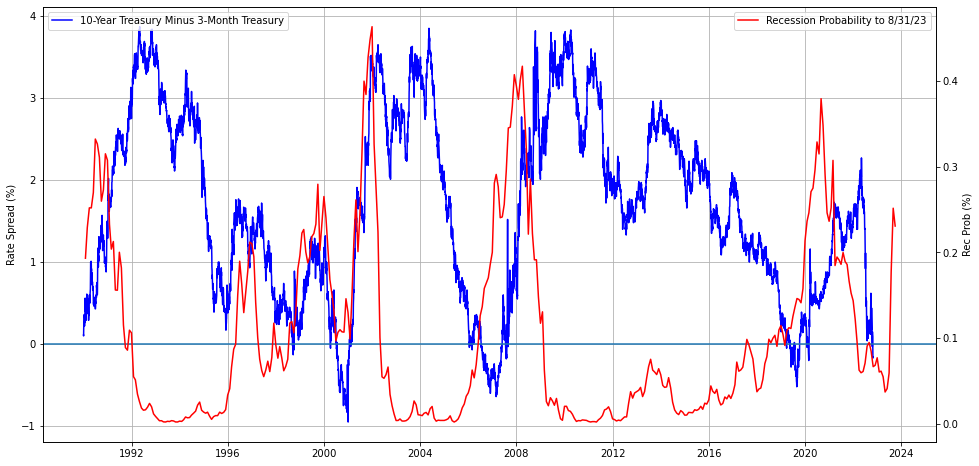

In [20]:
# Plot Ten Year-3 Month Treasury spread vs Recession Probability till 09/30/23
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='b')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability to 8/31/23', color='r')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right')

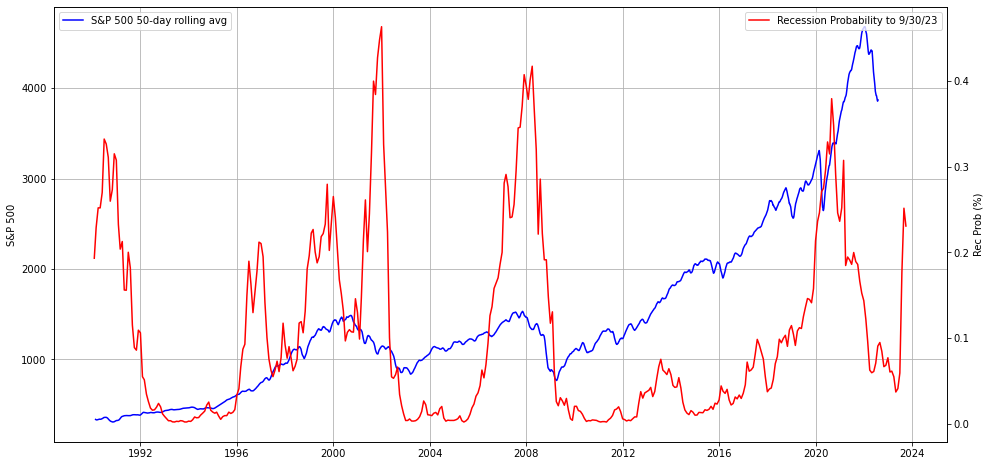

In [22]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability to 9/30/23', color='r')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right')